In [1]:
ls

drive/  sample_data/


In [2]:
cd drive/My\ Drive

/content/drive/My Drive


In [3]:
cd Colab/image-classification-keras/

/content/drive/My Drive/Colab/image-classification-keras


In [4]:
ls

data/  examples/  graph.png  Mask_1209.model  Test.ipynb  Train.ipynb


In [6]:
from tensorflow.keras.models import load_model

# load the trained convolutional neural network
print("[INFO] loading network...")
model = load_model("Mask_1209.model")

[INFO] loading network...


In [7]:
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow

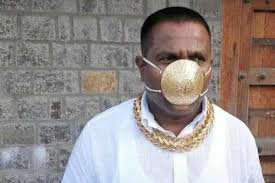

In [25]:
# load the image
image = cv2.imread("examples/5.jpg")
cv2_imshow(image)
orig = image.copy()

In [26]:
# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [27]:
# classify the input image
(without_mask, with_mask) = model.predict(image)[0]

In [28]:
# build the label
label = "with_mask" if with_mask > without_mask else "without_mask"
proba = with_mask if with_mask > without_mask else without_mask
label = "{}: {:.2f}%".format(label, proba * 100)

In [29]:
# draw the label on the image
out_resize = imutils.resize(orig, width=400)
output = cv2.putText(out_resize, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)

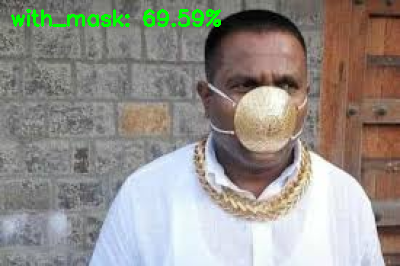

In [30]:
# show the output image
cv2_imshow(output)